<h1 align="center"> 决策树可视化 (Scikit-learn, Matplotlib) </h1># 

## 如何使用 Scikit-learn 来构建决策树模型？

为了可视化决策树, 我们需要首先使用 scikit-learn 来构建决策树模型。额外阅读可以参看 [Understanding Decision Trees for Classification (Python) tutorial](https://towardsdatascience.com/understanding-decision-trees-for-classification-python-9663d683c952) ，你可以看到更多有关决策树的细节。

### 导入依赖

In [92]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

### 加载数据集

鸢尾花数据集是 scikit-learn 内置的无需从外部网站下载任何文件的数据集之一。下面的代码加载了鸢尾花数据集。

In [8]:
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### 将数据集划分为训练集和测试集

![images](../3_decision/trainTestSplit.png)
图片中的颜色表示数据框（DataFrame）df 中的数据被分配给了特定的训练、测试集中的变量（X_train、X_test、Y_train、Y_test）。图片由 [Michael Galarnyk](https://twitter.com/GalarnykMichael) 创建。

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(df[data.feature_names], df['target'], random_state=0)

### Scikit-learn 4步建模

**Step 1**: 导入需要使用的模型 

在 sklearn 中，所有机器学习模型都被封装为 python 类。

In [9]:
# 我们已经在依赖模块中导入了需要的决策树模型
from sklearn.tree import DecisionTreeClassifier

**Step 2**: 将模型实例化

In [85]:
clf = DecisionTreeClassifier(max_depth = 2, random_state = 0, criterion='entropy')

**Step 3**: 训练模型

In [86]:
clf.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=0)

**Step 4**: 对新数据进行预测

使用在训练过程中在模型中保存的数据，针对新样本数据进行预测。

In [87]:
# 返回一个 Numpy 数组
# 预测单一样本
print(f">>test\n{X_test[:1]}")
y_predict = clf.predict(X_test[:1])
y = Y_test.iloc[0]
print(f"predict: {y_predict} | answer: {y}")

>>test
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
114                5.8               2.8                5.1               2.4
predict: [2] | answer: 2


In [88]:
# 预测单一样本
print(f">>test\n{X_test[:5]}")
y_predict = clf.predict(X_test[:5])
y = Y_test.iloc[:5].tolist()
print(f"predict: {y_predict} | answer: {y}")

>>test
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
114                5.8               2.8                5.1               2.4
62                 6.0               2.2                4.0               1.0
33                 5.5               4.2                1.4               0.2
107                7.3               2.9                6.3               1.8
7                  5.0               3.4                1.5               0.2
predict: [2 1 0 2 0] | answer: [2, 1, 0, 2, 0]


### 评价模型

尽管有其他衡量模型性能的方式（精确度、召回率、F1分数、ROC曲线等），我们将保持简单，以预测准确率作为我们的度量标准。为此，我们将评价模型在新数据（测试集）上的表现。

准确度定义为：
得分 = 正确预测数 / 总数据样本数

In [90]:
score = clf.score(X_test, Y_test)
print(f"predict score: {score}")

predict score: 0.8947368421052632


### 使用 Matplotlib 将决策树可视化

在 scikit-learn 版本 21.0（大致是2019年5月左右），决策树现在可以使用 scikit-learn 的 `tree.plot_tree` 与 matplotlib 直接绘制，而无需依赖 dot 库，而 dot 库通常是相对难以安装的依赖项。

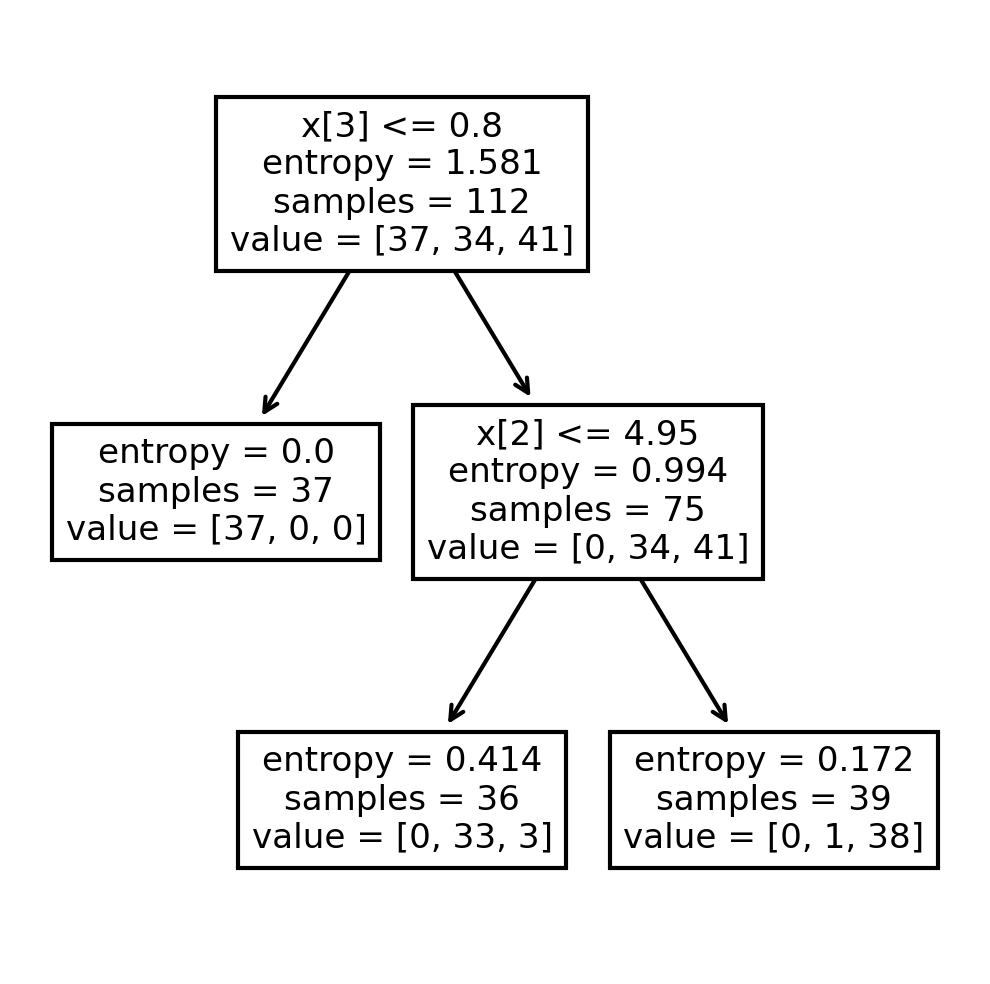

In [91]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi = 300)
tree.plot_tree(clf);

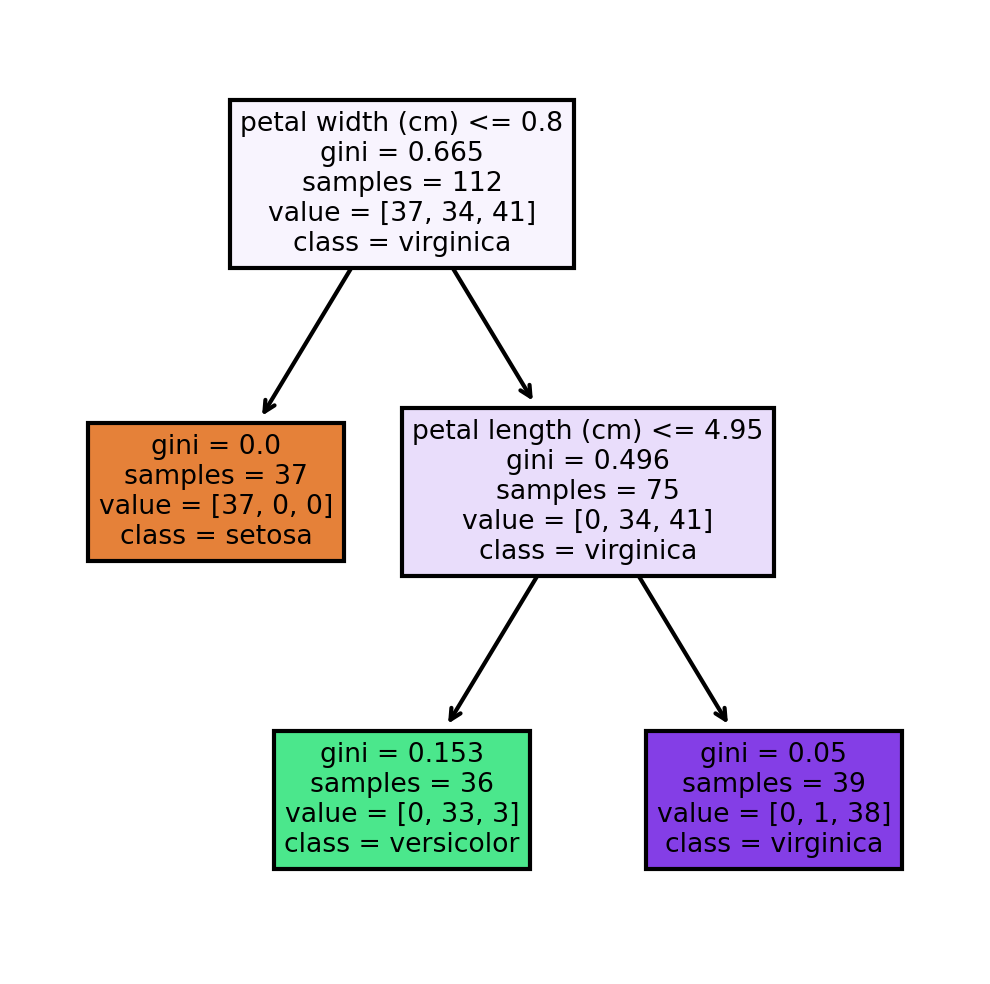

In [84]:
# 保存特征名称和分类名称，以便我们理解图示的意义
feature_name = ['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
class_name = ['setosa', 'versicolor', 'virginica']

fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi = 300)

tree.plot_tree(clf,
               feature_names = feature_name, 
               class_names = class_name,
               filled = True);